In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# seeing the data
data = pd.read_csv("dataset.csv")
print(data.shape)
data.head()

(1781, 21)


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,utf-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,iso-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,utf-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [3]:
#in the dataset, there is 21 columns, the last column is the class label
#lets check whether the dataset is imbalance
data["Type"].value_counts()

0    1565
1     216
Name: Type, dtype: int64

The dataset is highly imbalanced. Only 216 datapoints are malicious or phishing. i.e. only 12% of the data has class label 1

## Feature exploration
#### 1. URL_LENGTH

Number of unique values in URL_LENGTH 142
mean of URL_LENGTH 56.96125772038181


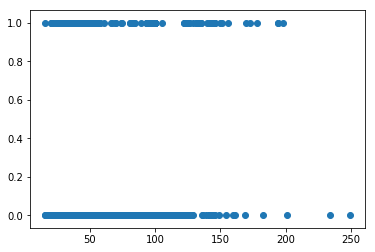

In [4]:
print("Number of unique values in URL_LENGTH",len(data["URL_LENGTH"].value_counts()))
print("mean of URL_LENGTH",data["URL_LENGTH"].mean())
plt.scatter(data["URL_LENGTH"], data["Type"])
plt.show()

In [5]:
#from the above plot we can see that if the length of the url is greater than 170, very few are good urls
#lets check that stats
length_greater_170 = data[data["URL_LENGTH"] > 170]
print(length_greater_170.shape)
print(length_greater_170["Type"].value_counts())

(9, 21)
1    5
0    4
Name: Type, dtype: int64


If the URL_LENGTH is too large then the chances of that website being suspicious is high

#### 2. NUMBER OF SPECIAL CHARACTERS

Number of unique special characters: 31
mean of NUMBER OF SPECIAL CHARACTERS 11.11173498034812


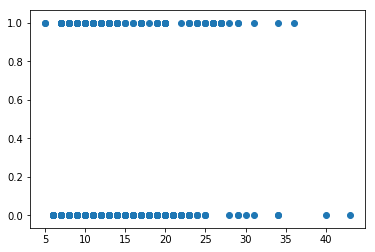

In [6]:
print("Number of unique special characters:", len(data["NUMBER_SPECIAL_CHARACTERS"].value_counts()))
print("mean of NUMBER OF SPECIAL CHARACTERS",data["NUMBER_SPECIAL_CHARACTERS"].mean())
plt.scatter(data["NUMBER_SPECIAL_CHARACTERS"], data["Type"])
plt.show()

In [7]:
#from the above plot we can see that if the NUMBER OF SPECIAL CHARACTERS is greater than 25, very few are good urls
#lets check that stats
SPCL_CHARS_25 = data[data["NUMBER_SPECIAL_CHARACTERS"] > 25]
print(SPCL_CHARS_25.shape)
print(SPCL_CHARS_25["Type"].value_counts())

(28, 21)
1    19
0     9
Name: Type, dtype: int64


If the number of special characters in an url is more than 25, most of cases the url turns out not to be good

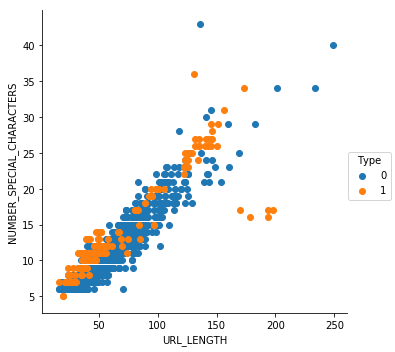

In [8]:
#lets check how these two feature together behaves with the class label
sns.FacetGrid(data, hue="Type", size=5) \
   .map(plt.scatter, "URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS") \
   .add_legend()
plt.show()

1. One thing to be noticed here is, if the URL_LENGTH is greater than 150 and NUMBER OF SPECIAL CHARACTERS is between 15 to 20, then the website is not legitimate.
2. Also, if the URL LENGTH is greater than 120 and NUMBER OF SPECIAL CHARACTERS is between 22 to 30, a remarkable number of malicious url are there.
Lets check that stats

In [9]:
data_120 = data[data["URL_LENGTH"] > 120]
data_160 = data_120[data_120["URL_LENGTH"] < 155]
data_22 = data_160[data_160["NUMBER_SPECIAL_CHARACTERS"] > 22 ]
data_30 = data_22[data_22["NUMBER_SPECIAL_CHARACTERS"] <= 30]
data_30["Type"].value_counts()

1    27
0     8
Name: Type, dtype: int64

We can see that,
>if url_length > 120 && url_length < 155 && number of character > 22 && number of characters < 30:
>>                "77 percent of time the url is malicious"

#### 3. CHARSET

In [10]:
print("unique values:")
data["CHARSET"].value_counts()

unique values:


utf-8           1055
iso-8859-1       561
us-ascii         155
None               7
windows-1252       1
windows-1251       1
ISO-8859           1
Name: CHARSET, dtype: int64

In [11]:
# r_temp1 = data[data["CHARSET"]=='UTF-8']
# print("UTF-8 : ",np.unique(r_temp1['Type'],return_counts=True))
# r_temp1 = data[data["CHARSET"]=='ISO-8859-1']
# print('ISO-8859-1',np.unique(r_temp1['Type'],return_counts=True))
x1,y1=[],[]
r_temp1 = data[data["CHARSET"]=='utf-8']
print('utf-8',np.unique(r_temp1['Type'],return_counts=True))
x1.append(np.unique(r_temp1['Type'],return_counts=True)[1][0])
y1.append(np.unique(r_temp1['Type'],return_counts=True)[1][1])
r_temp1 = data[data["CHARSET"]=='us-ascii']
print('us-ascii',np.unique(r_temp1['Type'],return_counts=True))
x1.append(np.unique(r_temp1['Type'],return_counts=True)[1][0])
y1.append(np.unique(r_temp1['Type'],return_counts=True)[1][1])
r_temp1 = data[data["CHARSET"]=='iso-8859-1']
print('iso-8859-1',np.unique(r_temp1['Type'],return_counts=True))
x1.append(np.unique(r_temp1['Type'],return_counts=True)[1][0])
y1.append(np.unique(r_temp1['Type'],return_counts=True)[1][1])
r_temp1 = data[data["CHARSET"]=='None']
print('None',np.unique(r_temp1['Type'],return_counts=True))
x1.append(np.unique(r_temp1['Type'],return_counts=True)[1][0])
y1.append(np.unique(r_temp1['Type'],return_counts=True)[1][1])
r_temp1 = data[data["CHARSET"]=='ISO-8859']
print('ISO-8859',np.unique(r_temp1['Type'],return_counts=True))
x1.append(np.unique(r_temp1['Type'],return_counts=True)[1][0])
y1.append(0)
r_temp1 = data[data["CHARSET"]=='windows-1251']
print('windows-1251',np.unique(r_temp1['Type'],return_counts=True))
x1.append(0)
y1.append(np.unique(r_temp1['Type'],return_counts=True)[1][0])
r_temp1 = data[data["CHARSET"]=='windows-1252']
print('windows-1252',np.unique(r_temp1['Type'],return_counts=True))
x1.append(np.unique(r_temp1['Type'],return_counts=True)[1][0])
y1.append(0)

utf-8 (array([0, 1], dtype=int64), array([903, 152], dtype=int64))
us-ascii (array([0, 1], dtype=int64), array([151,   4], dtype=int64))
iso-8859-1 (array([0, 1], dtype=int64), array([503,  58], dtype=int64))
None (array([0, 1], dtype=int64), array([6, 1], dtype=int64))
ISO-8859 (array([0], dtype=int64), array([1], dtype=int64))
windows-1251 (array([1], dtype=int64), array([1], dtype=int64))
windows-1252 (array([0], dtype=int64), array([1], dtype=int64))


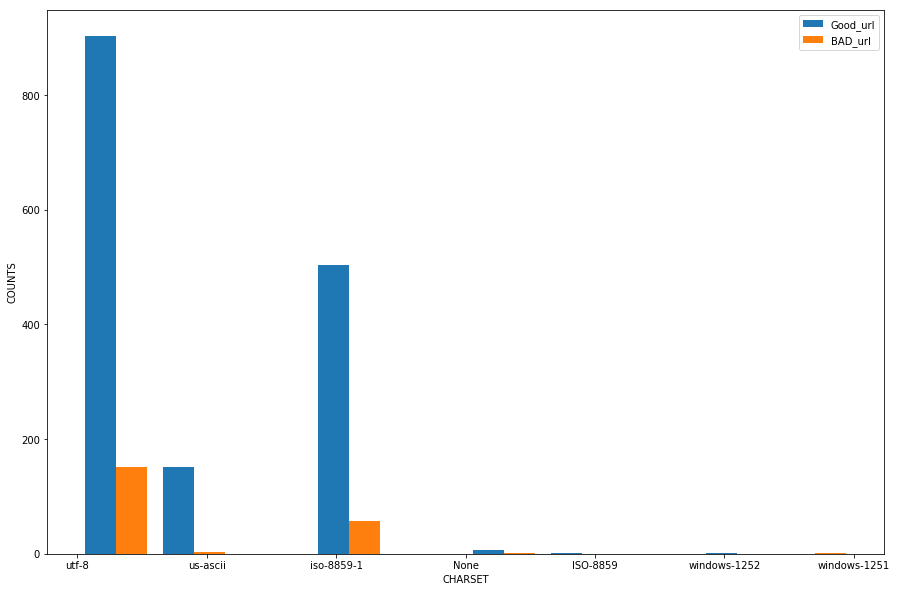

In [12]:
good_url = data[data["Type"] == 0]["CHARSET"]
bad_url = data[data["Type"] == 1]["CHARSET"]
plt.figure(figsize = (15,10))
plt.hist([good_url , bad_url])
plt.xlabel("CHARSET")
plt.ylabel("COUNTS")
plt.legend(('Good_url', 'BAD_url'))

plt.show()


#### 4. SERVER

In [13]:
print("Unique values in server:")
print(data.SERVER.nunique())

Unique values in server:
239


In [14]:
data["SERVER"].value_counts()[:5]

Apache                   386
nginx                    211
None                     175
Microsoft-HTTPAPI/2.0    113
cloudflare-nginx          94
Name: SERVER, dtype: int64

#### 5. CONTENT LENGTH

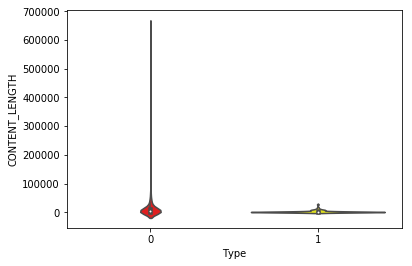

In [15]:
import warnings
warnings.filterwarnings("ignore")
sns.violinplot(x="Type", y="CONTENT_LENGTH",  palette={"red","yellow"}, data=data, size=6)
plt.show()

This plot shows the distribution of the content length of good and bad urls. 
1. The content length is significantly lesser in bad urls

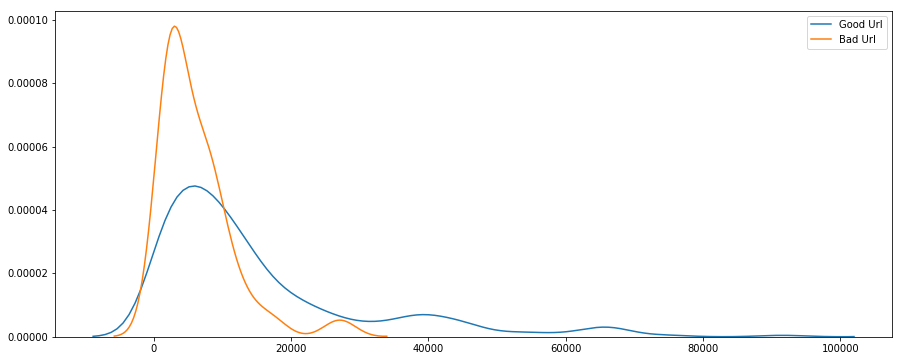

In [16]:
import warnings
warnings.filterwarnings("ignore")
DATA = data[data["CONTENT_LENGTH"] != np.nan]
x1 = DATA[DATA["Type"] == 0]["CONTENT_LENGTH"]
x2 = DATA[DATA["Type"] == 1]["CONTENT_LENGTH"]
plt.figure(figsize = (15,6))
sns.kdeplot(x1, clip = (1000,100000))
sns.kdeplot(x2,  clip = (1000,100000))
plt.legend(("Good Url", "Bad Url"))

The important observation from the above plot is for the bad urls, the content length is mostly less, if the content length is very high, the chance of the url being good is high

#### 6.  WHOIS_COUNTRY

In [19]:
print("Unique values in whois_country:")
print(data.WHOIS_COUNTRY.nunique())
print("--------------------")
print("Unique values         counts")
# print(data["WHOIS_COUNTRY"].value_counts().shape)

Unique values in whois_country:
49
--------------------
Unique values         counts


### Training

In [20]:
data.describe(include='all')

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781,1781.000000,1781.000000,1781,1780,969.000000,1781,1781,1781,1781,...,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
unique,1781,NaN,NaN,7,239,NaN,49,182,891,594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B0_745,NaN,NaN,utf-8,Apache,NaN,US,CA,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,1055,386,NaN,1103,372,127,139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,56.961258,11.111735,NaN,NaN,11726.927761,NaN,NaN,NaN,NaN,...,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,NaN,27.555586,4.549896,NaN,NaN,36391.809051,NaN,NaN,NaN,NaN,...,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,NaN,16.000000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,39.000000,8.000000,NaN,NaN,324.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,NaN,49.000000,10.000000,NaN,NaN,1853.000000,NaN,NaN,NaN,NaN,...,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,NaN,68.000000,13.000000,NaN,NaN,11323.000000,NaN,NaN,NaN,NaN,...,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000


In [21]:
data.drop('URL', axis=1, inplace=True)

In [25]:
# Take a look at any null values to clean up data
# Likely need to do something with these empty datasets
print(data.isnull().sum())
# data[pd.isnull(data).any(axis=1)]

URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


In [26]:
data = data.interpolate()
print(data.isnull().sum())

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


In [27]:
data['SERVER'].fillna('RARE_VALUE', inplace=True)

In [28]:
data.describe(include='all')

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,1781,1781,1781.000000,1781,1781,1781,1781,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1781.000000,1781.000000
unique,NaN,NaN,7,240,NaN,49,182,891,594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,utf-8,Apache,NaN,US,CA,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1055,386,NaN,1103,372,127,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,56.961258,11.111735,NaN,NaN,13497.243964,NaN,NaN,NaN,NaN,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263335,0.121280
std,27.555586,4.549896,NaN,NaN,38415.552697,NaN,NaN,NaN,NaN,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930036,0.326544
min,16.000000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,NaN,NaN,603.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,NaN,NaN,4714.750000,NaN,NaN,NaN,NaN,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,NaN,NaN,12578.500000,NaN,NaN,NaN,NaN,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000


In [31]:
# Convert categorical columns to numbered categorical columns
dataset_with_dummies = pd.get_dummies(data,prefix_sep='--')
dataset_with_dummies.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,WHOIS_UPDATED_DATE--9/09/2015 0:00,WHOIS_UPDATED_DATE--9/09/2015 20:47,WHOIS_UPDATED_DATE--9/09/2016 0:00,WHOIS_UPDATED_DATE--9/10/2015 0:00,WHOIS_UPDATED_DATE--9/11/2015 0:00,WHOIS_UPDATED_DATE--9/11/2016 0:00,WHOIS_UPDATED_DATE--9/12/2015 0:00,WHOIS_UPDATED_DATE--9/12/2015 14:43,WHOIS_UPDATED_DATE--9/12/2016 0:00,WHOIS_UPDATED_DATE--None
0,16,7,263.0,7,0,2,700,9,10,1153,...,0,0,0,0,0,0,0,0,0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,...,0,0,0,0,0,0,0,0,0,1
2,16,6,324.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,17,6,162.0,31,22,3,3812,39,37,18784,...,0,0,0,0,0,0,0,0,0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Separate predictors and response
X = dataset_with_dummies.drop('Type',axis=1) #Predictors
y = dataset_with_dummies['Type']

X.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,WHOIS_UPDATED_DATE--9/09/2015 0:00,WHOIS_UPDATED_DATE--9/09/2015 20:47,WHOIS_UPDATED_DATE--9/09/2016 0:00,WHOIS_UPDATED_DATE--9/10/2015 0:00,WHOIS_UPDATED_DATE--9/11/2015 0:00,WHOIS_UPDATED_DATE--9/11/2016 0:00,WHOIS_UPDATED_DATE--9/12/2015 0:00,WHOIS_UPDATED_DATE--9/12/2015 14:43,WHOIS_UPDATED_DATE--9/12/2016 0:00,WHOIS_UPDATED_DATE--None
0,16,7,263.0,7,0,2,700,9,10,1153,...,0,0,0,0,0,0,0,0,0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,...,0,0,0,0,0,0,0,0,0,1
2,16,6,324.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,17,6,162.0,31,22,3,3812,39,37,18784,...,0,0,0,0,0,0,0,0,0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Get a training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Train a Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier

# n_estimators is the number of random forests to use
# n_jobs says to use all processors available
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=80, criterion = 'entropy')
rf.fit(X_train, y_train)

print('Training Accuracy Score: {}'.format(rf.score(X_train, y_train)))

Training Accuracy Score: 1.0


In [36]:
# test
y_pred = rf.predict(X_test)

In [39]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Visualize our results
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):

    print("Test results:\n")
    print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
    print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
    print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

print_score(rf,X_train,y_train,X_test,y_test)

Test results:

Accuracy Score: 0.9607

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       462
           1       0.98      0.73      0.83        73

   micro avg       0.96      0.96      0.96       535
   macro avg       0.97      0.86      0.91       535
weighted avg       0.96      0.96      0.96       535


Confusion Matrix:
[[461   1]
 [ 20  53]]



In [40]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# prediction["KNN"] = pred

print_score(clf,X_train,y_train,X_test,y_test)

Test results:

Accuracy Score: 0.8766

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       462
           1       0.57      0.37      0.45        73

   micro avg       0.88      0.88      0.88       535
   macro avg       0.74      0.66      0.69       535
weighted avg       0.86      0.88      0.86       535


Confusion Matrix:
[[442  20]
 [ 46  27]]



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# prediction["KNN"] = pred

print_score(clf,X_train,y_train,X_test,y_test)